In [1]:
## Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Setting the figure size
plt.rcParams["figure.figsize"] = (15,8)

In [2]:
# Set path
path = r'C:\Users\karya\Sourcing Open Data'

In [3]:
path

'C:\\Users\\karya\\Sourcing Open Data'

In [4]:
# Importing boat_data
df= pd.read_csv(os.path.join(path, '02. Data','Original Data', 'boat_data.csv'))

# Exploring the data with pandas

In [5]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [6]:
df.shape

(9888, 10)

# Cleaning the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


## The 'Price' 'Type' and Location Columns needs to be manipulated.
## The 'Price' Column Data Type need to be changed to int.
## Missing Values should be dealt with.
## Duplicate Values should be Dealt with.

# 01. split the 'Price' column

In [8]:
df[['currency','Price']]= df['Price'].str.split(' ', expand=True)

In [9]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


### 1.1. Now we will create a column that should contain the sales price in Euro and call it Euro_price
#### we should keep in mind the current exchange rate ( on 28/11/2023) of Euro in other currencies 


1 CHF = 1.04 Euro

1 DDk = 0.13 Euro

Â£ = 1.15 Euro

In [10]:
def europrice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.04
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.15
df['price_in_Euro'] = df.apply(lambda x: europrice(x.Price, x.currency), axis=1)

In [11]:
# To check 

df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price_in_Euro
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3470.48
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3920.8
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3367.0
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [12]:
type('price_in_Euro')

str

In [13]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price_in_Euro
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3470.48
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3920.8
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3367.0
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [14]:
# Now lets get rid of the unnecessary columns Price and currency

df = df.drop('Price', axis= 1)

In [15]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price_in_Euro
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3470.48
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3920.8
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3367.0
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [16]:
# Drop the currency column 

df= df.drop('currency', axis= 1)

In [17]:
# To check

df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399


### 02. Split the type column

In [18]:
df[['EGN_Condition', 'Engine_type']] = df['Type'].str.split(',', n=1 , expand = True )

In [19]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None


In [20]:
df.loc[df['EGN_Condition'].isin(['new boat from stock', 'new boat on order', 'Display Model']), 'Engine_condition'] = 'New'
df.loc[df['EGN_Condition']== 'Used boat', 'Engine_condition'] = 'Used'
df

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\3283893641.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'New' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['EGN_Condition'].isin(['new boat from stock', 'new boat on order', 'Display Model']), 'Engine_condition'] = 'New'


,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,5096.0,Used boat,Unleaded,Used
9884,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94,4516,new boat from stock,None,New
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,4499,new boat from stock,Unleaded,New
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,4300,new boat from stock,None,New


In [21]:
df.loc[df['Year Built'] < 2000, 'Boat_age'] ='Very Old (built before 2000)'

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1706967128.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Very Old (built before 2000)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Year Built'] < 2000, 'Boat_age'] ='Very Old (built before 2000)'


In [22]:
df.loc[(df['Year Built'] >= 2000) & (df['Year Built'] <= 2017), 'Boat_age'] = 'Old (built between 2000-2017)'

In [23]:
df.loc[df['Year Built'] > 2017, 'Boat_age'] = ' Modern (built after 2017)'

In [24]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New,Old (built between 2000-2017)
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New,Modern (built after 2017)
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New,Very Old (built before 2000)
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New,Modern (built after 2017)
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New,Modern (built after 2017)


### 02. Now lets split the Location column into country and city

In [25]:
df['Location'].str.split('Â»', n=2 , expand = True )

,0,1,2
0,Switzerland,Lake Geneva,VÃ©senaz
1,Germany,BÃ¶nningstedt,None
2,Switzerland,Lake of Zurich,StÃ¤fa ZH
3,Denmark,Svendborg,None
4,Germany,Bayern,MÃ¼nchen
...,...,...,...
9883,Switzerland,Lago Maggiore,Riazzino
9884,Germany,Hamburg,HAMBURG
9885,Germany,Nordrhein-Westfalen,Wesel
9886,Italy,Dormelletto,None


In [26]:
df[['Country', 'City', 'Other']] = df['Location'].str.split('Â»', n=2 , expand = True )

In [27]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age,Country,City,Other
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,VÃ©senaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New,Modern (built after 2017),Germany,BÃ¶nningstedt,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,StÃ¤fa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New,Modern (built after 2017),Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New,Modern (built after 2017),Germany,Bayern,MÃ¼nchen


### To remove '¶' and 'Ã' mistakenly typed in city names

In [28]:
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

In [29]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age,Country,City,Other
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,VÃ©senaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New,Modern (built after 2017),Germany,Bnningstedt,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,StÃ¤fa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New,Modern (built after 2017),Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New,Modern (built after 2017),Germany,Bayern,MÃ¼nchen


### Drop the 'Other'  and 'Location' Columns

In [30]:
df = df.drop(columns =['Other'], axis= 1)

In [31]:
# To check

df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New,Modern (built after 2017),Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New,Modern (built after 2017),Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New,Modern (built after 2017),Germany,Bayern


### The Country column still has some value that are not the names of any country , instead they are names of a place in a country , they should be found in which country they locate and then be replaced with the relevant country names.

In [32]:
df['Country'].replace(['83278 Traunstein','baden baden','Beilngries ','Bielefeld','bodensee','Brandenburg ','Brandenburg an derHavel','Bremen','Donau','Donau ','Greetsile/ KrummhÃƒÂ¶rn','Heilbronn','Neustadt in Holstein (Ostsee)','NordseekÃƒÂ¼ste','Ostsee ','Rheinfelden','Rolle','Steinwiesen','Stralsund ','TravemÃƒÂ¼nde ','waren mÃƒÂ¼ritz ','Wijdenes'],'Germany', inplace=True)

In [33]:
df['Country'].replace(['Adria','Angera ','Italie','Italien ','Lago di Garda ','Porto Rotondo','Toscana'],'Italy', inplace=True)

In [34]:
df['Country'].replace(['annecy','Martinique '],'France', inplace=True)

In [35]:
df['Country'].replace(['Avenches','Faoug','Lago Maggiore ','Lago Maggiore, Minusio','Lake Constance ','Lake Geneva ','Tenero, lago Maggiore','Thun','VierwaldstÃƒÂ¤ttersee - Buochs','Welschenrohr','ZÃƒÂ¼richse, 8855 Wangen SZ'],'Switzerland', inplace=True)

In [36]:
df['Country'].replace(['Calanova Mallorca ','espa?a ','Ibiza','Mallorca '],'Spain', inplace=True)

In [37]:
df['Country'].replace(['Izola'],'Slovenia', inplace=True)

In [38]:
df['Country'].replace(['Katwijk ','Zevenbergen'],'Netherlands ', inplace=True)

In [39]:
df['Country'].replace(['Isle of Man '],'Ireland ', inplace=True)

In [40]:
df['Country'].replace(['Juelsminde Havn ','PT ÃƒÂ¸stkysten ellers Esbjerg '],'Denmark ', inplace=True)

In [41]:
df['Country'].replace(['Croatia (Hrvatska)','Croatia (Hrvatska) ','Dalmatien','Kroatien Krk','Marina Punat','Novi Vinodolski ','Rovinij','Split'], 'Croatia', inplace=True)

In [42]:
df['Country'].replace(['BelgiÃƒÂ«, Zulte ','Lommel','Opwijk'], 'Belgium ', inplace=True)

In [43]:
df['Country'].replace(['Thailand'], 'Thailand ', inplace=True)

In [44]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,new boat from stock,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,new boat from stock,None,New,Modern (built after 2017),Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,new boat from stock,None,New,Modern (built after 2017),Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,new boat from stock,None,New,Modern (built after 2017),Germany,Bayern


### Split the 'Boat Type' column

In [45]:
df[['Boat_Type', 'Other_type','other']] = df['Boat Type'].str.split(',', n=2 , expand = True )

In [46]:
df.tail(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,EGN_Condition,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Other_type,other
9878,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917,5198.96,Used boat,Unleaded,Used,Very Old (built before 2000),Switzerland,Lake of Zurich,Sport Boat,Wakeboard/Wakesurf,Water ski
9879,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,NaN,Switzerland Â» Safenwil,280,5189.6,new boat on order,None,New,Very Old (built before 2000),Switzerland,Safenwil,Sport Boat,None,None
9880,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,247,5179.2,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake Constance,Sport Boat,None,None
9881,Sport Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,150,5148.0,new boat from stock,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,Sport Boat,None,None
9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288,5148.0,Used boat,Unleaded,Used,Very Old (built before 2000),Switzerland,Bielersee,Fishing Boat,None,None
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,5096.0,Used boat,Unleaded,Used,Very Old (built before 2000),Switzerland,Lago Maggiore,Sport Boat,None,None
9884,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94,4516,new boat from stock,None,New,Very Old (built before 2000),Germany,Hamburg,Sport Boat,None,None
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,4499,new boat from stock,Unleaded,New,Modern (built after 2017),Germany,Nordrhein-Westfalen,Sport Boat,None,None
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,4300,new boat from stock,None,New,Modern (built after 2017),Italy,Dormelletto,Pontoon Boat,None,None
9887,Fishing Boat,DarekCo power boats,new boat from stock,2019,3.60,1.60,GRP,Switzerland Â» Brienzersee Â» Brienz,194,3931.2,new boat from stock,None,New,Modern (built after 2017),Switzerland,Brienzersee,Fishing Boat,None,None


In [47]:
df = df.drop(columns =['EGN_Condition', 'Other_type', 'other'], axis= 1)

In [48]:
df.head(10)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,None,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,Sport Boat
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,None,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,None,New,Modern (built after 2017),Germany,Bayern,Fishing Boat
5,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,3796.0,None,New,Very Old (built before 2000),Switzerland,Lake Constance,Sport Boat
6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,3744.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran
7,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134,3224.0,None,Used,Very Old (built before 2000),Denmark,Svendborg,Sport Boat
8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,3333,None,New,Modern (built after 2017),Germany,Bayern,Fishing Boat
9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180,3300,None,New,Modern (built after 2017),Italy,Dormelletto,Pontoon Boat


# Cleaning the Data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9888 non-null   object 
 1   Manufacturer                 8550 non-null   object 
 2   Type                         9882 non-null   object 
 3   Year Built                   9888 non-null   int64  
 4   Length                       9879 non-null   float64
 5   Width                        9832 non-null   float64
 6   Material                     8139 non-null   object 
 7   Location                     9852 non-null   object 
 8   Number of views last 7 days  9888 non-null   int64  
 9   price_in_Euro                9888 non-null   object 
 10  Engine_type                  7596 non-null   object 
 11  Engine_condition             9802 non-null   object 
 12  Boat_age                     9888 non-null   object 
 13  Country           

In [50]:
df.shape

(9888, 16)

## 01. Dealing with missing Values:
     First lets find how many values are missing in each column"

In [51]:
df.isnull().sum().sort_values()

Boat Type                         0
Year Built                        0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Type                              6
Length                            9
Location                         36
Country                          36
Width                            56
Engine_condition                 86
City                            943
Manufacturer                   1338
Material                       1749
Engine_type                    2292
dtype: int64

In [52]:
df.isna().sum().sort_values()

Boat Type                         0
Year Built                        0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Type                              6
Length                            9
Location                         36
Country                          36
Width                            56
Engine_condition                 86
City                            943
Manufacturer                   1338
Material                       1749
Engine_type                    2292
dtype: int64

In [53]:
# To find what percent of the data is missing 

(df.isnull().sum()/len(df) * 100).sort_values()

Boat Type                       0.000000
Year Built                      0.000000
Number of views last 7 days     0.000000
price_in_Euro                   0.000000
Boat_age                        0.000000
Boat_Type                       0.000000
Type                            0.060680
Length                          0.091019
Location                        0.364078
Country                         0.364078
Width                           0.566343
Engine_condition                0.869741
City                            9.536812
Manufacturer                   13.531553
Material                       17.688107
Engine_type                    23.179612
dtype: float64

### The output shows that City, Manufacturer, Mterial and Engin_type have a large percentage of the missing values.

# Ways to Deal with the missing values include

### 1.Imputation

### 2.Removing

### 3. Doing Nothing

#### Here we will remove the missing values one by one from  those columns that have less than one percent of the missing values. they include 'Type',  EGN_condition, ''Lenght', 'Country','Width' and 'Engine_condition'

In [54]:
df.isnull().sum().sort_values()

Boat Type                         0
Year Built                        0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Type                              6
Length                            9
Location                         36
Country                          36
Width                            56
Engine_condition                 86
City                            943
Manufacturer                   1338
Material                       1749
Engine_type                    2292
dtype: int64

In [55]:
df.shape

(9888, 16)

In [56]:
missing_val = ["NA", "NaN", " ", "np"]
df.isin(missing_val)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9884,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9885,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9886,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df.isnull().sum().sort_values()

Boat Type                         0
Year Built                        0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Type                              6
Length                            9
Location                         36
Country                          36
Width                            56
Engine_condition                 86
City                            943
Manufacturer                   1338
Material                       1749
Engine_type                    2292
dtype: int64

In [58]:
df_clean = df.dropna(subset = ['Type'])

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9882 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9882 non-null   object 
 1   Manufacturer                 8546 non-null   object 
 2   Type                         9882 non-null   object 
 3   Year Built                   9882 non-null   int64  
 4   Length                       9873 non-null   float64
 5   Width                        9826 non-null   float64
 6   Material                     8138 non-null   object 
 7   Location                     9846 non-null   object 
 8   Number of views last 7 days  9882 non-null   int64  
 9   price_in_Euro                9882 non-null   object 
 10  Engine_type                  7596 non-null   object 
 11  Engine_condition             9802 non-null   object 
 12  Boat_age                     9882 non-null   object 
 13  Country                

In [60]:
df_clean.isnull().sum().sort_values()

Boat Type                         0
Type                              0
Year Built                        0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Length                            9
Location                         36
Country                          36
Width                            56
Engine_condition                 80
City                            943
Manufacturer                   1336
Material                       1744
Engine_type                    2286
dtype: int64

In [61]:
df_clean.shape

(9882, 16)

In [62]:
df_clean1 = df_clean.dropna(subset = ['Length'])

In [63]:
df_clean1.isnull().sum().sort_values()

Boat Type                         0
Type                              0
Year Built                        0
Length                            0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Boat_Type                         0
Location                         36
Country                          36
Width                            47
Engine_condition                 79
City                            941
Manufacturer                   1335
Material                       1739
Engine_type                    2280
dtype: int64

In [64]:
df_clean1.shape

(9873, 16)

In [65]:
df_clean2 = df_clean1.dropna(subset = ['Country'])

In [66]:
df_clean2.isnull().sum().sort_values()

Boat Type                         0
Type                              0
Year Built                        0
Length                            0
Location                          0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Country                           0
Boat_Type                         0
Width                            47
Engine_condition                 79
City                            905
Manufacturer                   1328
Material                       1739
Engine_type                    2280
dtype: int64

In [67]:
df_clean2.shape

(9837, 16)

In [68]:
df_clean2.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,None,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,Sport Boat
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,None,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,None,New,Modern (built after 2017),Germany,Bayern,Fishing Boat


In [69]:
df_clean3 = df_clean2.dropna(subset = ['Width'])

In [70]:
df_clean3.isnull().sum().sort_values()

Boat Type                         0
Type                              0
Year Built                        0
Length                            0
Width                             0
Location                          0
Number of views last 7 days       0
price_in_Euro                     0
Boat_age                          0
Country                           0
Boat_Type                         0
Engine_condition                 79
City                            897
Manufacturer                   1314
Material                       1712
Engine_type                    2265
dtype: int64

In [71]:
df_clean3.shape

(9790, 16)

In [72]:
df_clean3.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490,None,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3920.8,None,New,Very Old (built before 2000),Switzerland,Lake of Zurich,Sport Boat
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,None,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399,None,New,Modern (built after 2017),Germany,Bayern,Fishing Boat


In [73]:
df_clean4 = df_clean3.dropna(subset = ['Engine_condition'])

In [74]:
df_clean4.shape

(9711, 16)

In [75]:
# Explore Null values in Manufacturer Column
df_clean4[df_clean4['Manufacturer'].isnull()]

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,3744.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran
17,Sport Boat,NaN,Used boat,1985,4.00,1.00,NaN,Denmark Â» Svendborg,124,3900.0,None,Used,Very Old (built before 2000),Denmark,Svendborg,Sport Boat
19,Cabin Boat,NaN,"Used boat,Unleaded",2011,6.37,2.31,GRP,Germany Â» Bayern Â» Forchheim/Ofr.,330,4000,Unleaded,Used,Old (built between 2000-2017),Germany,Bayern,Cabin Boat
24,Cabin Boat,NaN,Used boat,1985,6.53,2.47,NaN,"France Â» Marseille, France",383,3900,None,Used,Very Old (built before 2000),France,"Marseille, France",Cabin Boat
28,Fishing Boat,NaN,"Used boat,Unleaded",1994,5.60,1.58,GRP,Switzerland Â» Lake of Zurich Â» Altendorf SZ,641,4160.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Lake of Zurich,Fishing Boat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,Sport Boat,NaN,"Used boat,Unleaded",0,4.60,1.80,GRP,Germany,185,4990,Unleaded,Used,Very Old (built before 2000),Germany,None,Sport Boat
9866,Sport Boat,NaN,Used boat,1985,4.00,1.00,NaN,Denmark Â» Svendborg,96,4745.0,None,Used,Very Old (built before 2000),Denmark,Svendborg,Sport Boat
9873,Working Boat,NaN,"new boat from stock,Electric",2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote Jochum,41,4799,Electric,New,Modern (built after 2017),Germany,Bayern,Working Boat
9875,Classic,NaN,Used boat,1962,4.10,1.50,Wood,Austria Â» PÃ¶llau,188,4790,None,Used,Very Old (built before 2000),Austria,Pllau,Classic


In [76]:
# Explore Null values in Material column
df_clean3[df_clean3['Material'].isnull()]

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3470.48,None,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3367.0,None,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat
8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,3333,None,New,Modern (built after 2017),Germany,Bayern,Fishing Boat
9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180,3300,None,New,Modern (built after 2017),Italy,Dormelletto,Pontoon Boat
17,Sport Boat,NaN,Used boat,1985,4.00,1.00,NaN,Denmark Â» Svendborg,124,3900.0,None,Used,Very Old (built before 2000),Denmark,Svendborg,Sport Boat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,Fishing Boat,Hunter power boats,Used boat,2000,5.00,1.00,NaN,Denmark Â» Svendborg,87,4745.0,None,Used,Old (built between 2000-2017),Denmark,Svendborg,Fishing Boat
9873,Working Boat,NaN,"new boat from stock,Electric",2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote Jochum,41,4799,Electric,New,Modern (built after 2017),Germany,Bayern,Working Boat
9879,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,NaN,Switzerland Â» Safenwil,280,5189.6,None,New,Very Old (built before 2000),Switzerland,Safenwil,Sport Boat
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,5096.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Lago Maggiore,Sport Boat


### The output shows that City, Manufacturer, Mterial and Engin_type have a large percentage of the missing values
I would prefer to fill these missing values with None
Because imputing them with most commen values may skew the results.

In [77]:
# replace the NaN with None

df_clean4[['Manufacturer', 'Material', 'City', 'Engine_type']] = df_clean4[['Manufacturer', 'Material', 'City', 'Engine_type']].fillna(value='None')
df = df.dropna()

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1009160488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean4[['Manufacturer', 'Material', 'City', 'Engine_type']] = df_clean4[['Manufacturer', 'Material', 'City', 'Engine_type']].fillna(value='None')


In [78]:
(df_clean4.isnull().sum()/len(df_clean4) * 100).sort_values()

Boat Type                      0.0
Manufacturer                   0.0
Type                           0.0
Year Built                     0.0
Length                         0.0
Width                          0.0
Material                       0.0
Location                       0.0
Number of views last 7 days    0.0
price_in_Euro                  0.0
Engine_type                    0.0
Engine_condition               0.0
Boat_age                       0.0
Country                        0.0
City                           0.0
Boat_Type                      0.0
dtype: float64

In [79]:
### The output above shows that the 'price_in _Euro' column data type is not correct . it should be changed to float data type

df_clean4['price_in_Euro'] = df['price_in_Euro'].astype(float)

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\401651153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean4['price_in_Euro'] = df['price_in_Euro'].astype(float)


In [80]:
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9711 non-null   object 
 1   Manufacturer                 9711 non-null   object 
 2   Type                         9711 non-null   object 
 3   Year Built                   9711 non-null   int64  
 4   Length                       9711 non-null   float64
 5   Width                        9711 non-null   float64
 6   Material                     9711 non-null   object 
 7   Location                     9711 non-null   object 
 8   Number of views last 7 days  9711 non-null   int64  
 9   price_in_Euro                5299 non-null   float64
 10  Engine_type                  9711 non-null   object 
 11  Engine_condition             9711 non-null   object 
 12  Boat_age                     9711 non-null   object 
 13  Country                

In [81]:
df_clean4.shape

(9711, 16)

### Imput the missing values in the price_in_Euro column with the median value.

In [82]:
df['price_in_Euro'].fillna(87900, inplace=True)

# To check Duplicates

In [83]:
df_clean4.duplicated().sum()

1

In [84]:
df_clean3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9883    False
9884    False
9885    False
9886    False
9887    False
Length: 9790, dtype: bool

In [85]:
# To remove Duplicates

df_clean4 = df_clean4.drop_duplicates()

In [86]:
df_clean4.shape

(9710, 16)

In [87]:
# The 'Year Built' column includes 0 values that makes around 5% of the datframe, I prefer to drop them 

df_cleaned = df_clean4[df_clean3['Year Built']!=0]

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1351790534.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_clean4[df_clean3['Year Built']!=0]


In [88]:
df_cleaned.shape

(9162, 16)

# Exploratory Analysis

### Q1. Will the boat get more views depending on Boat_Type?

### Number of views last 7 days and Boat_Type

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1544607249.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',y='Boat_Type',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Boat_Type')

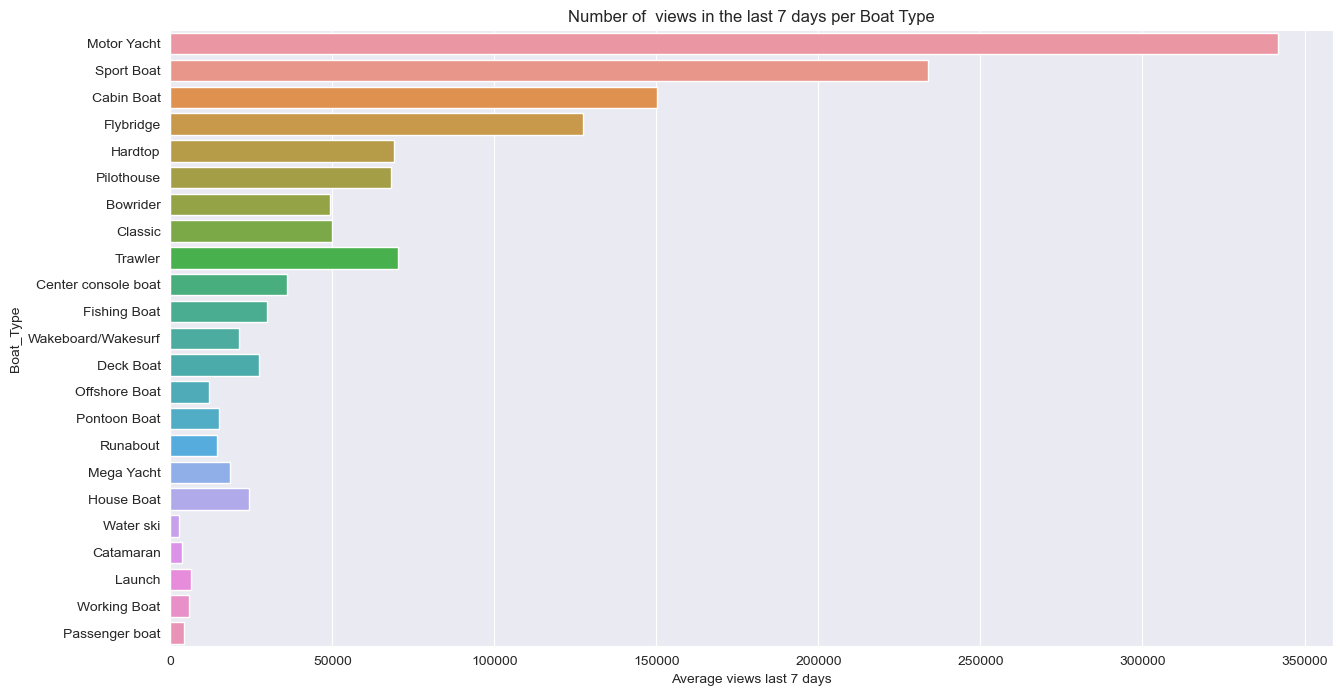

In [94]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',y='Boat_Type', 
            data= df_cleaned.sort_values(by = 'Number of views last 7 days', ascending= False), order= ['Motor Yacht', 'Sport Boat', 'Cabin Boat','Flybridge', 'Hardtop', 'Pilothouse', 'Bowrider', 'Classic', 'Trawler','Center console boat', 'Fishing Boat', 'Wakeboard/Wakesurf', 'Deck Boat', 'Offshore Boat', 'Pontoon Boat', 'Runabout', 'Mega Yacht', 'House Boat', 'Water ski', 'Catamaran', 'Launch', 'Working Boat', 'Passenger boat'],
            estimator= np.sum,
            ci=None)
plt.title('Number of  views in the last 7 days per Boat Type')
plt.xlabel('Average views last 7 days')
plt.ylabel('Boat_Type')

In [95]:
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'No_of_Views_Boat_Types.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\3204975544.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Number of views last 7 days',y='Boat_Type',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Boat_Type')

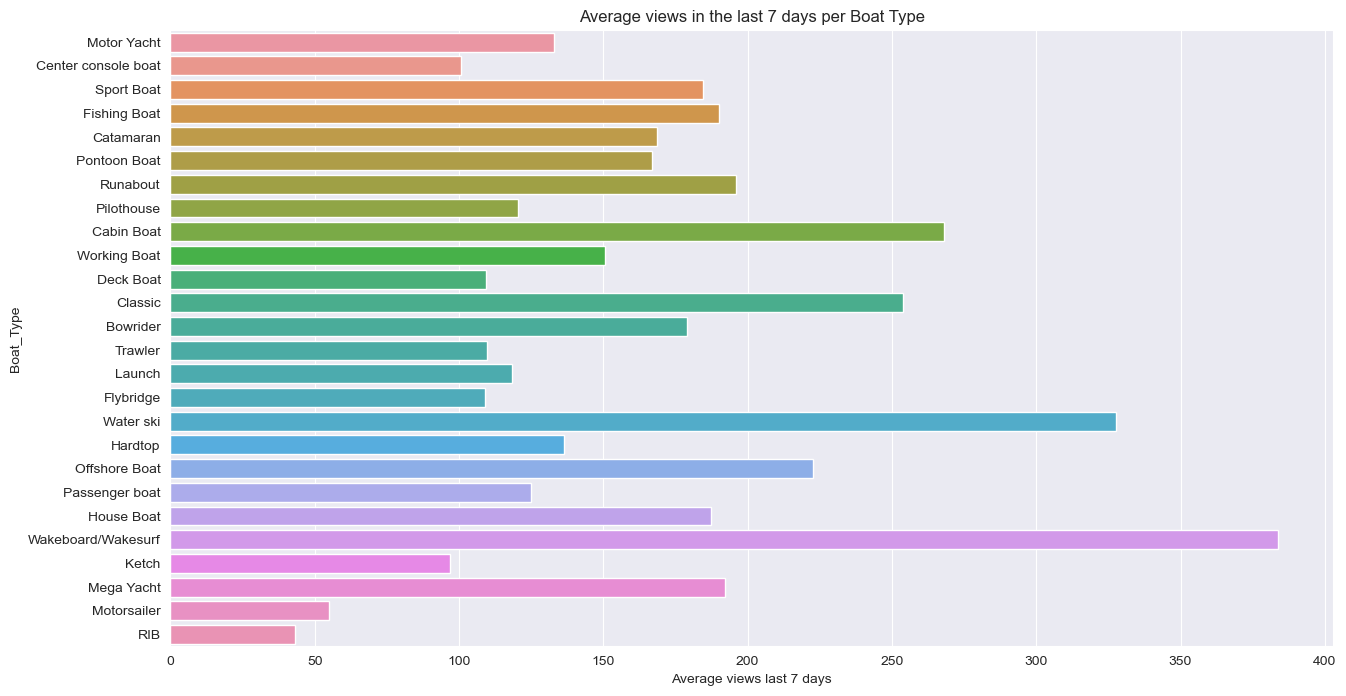

In [90]:
sns.set_style('darkgrid')
sns.barplot(x='Number of views last 7 days',y='Boat_Type', 
            data= df_cleaned, 
            ci= None )
plt.title('Average views in the last 7 days per Boat Type')
plt.xlabel('Average views last 7 days')
plt.ylabel('Boat_Type')

### The Insights:
1. Among all , Waterboard/Wakesurf has the highest average views in last 7 days, followed by Water ski, Cabin Boat, and Classic
2. As Waterboard /Wakesurf has the highest averages views , it indicates that people prefer fun-filled and family gathering boats for their intertainments.

### Number of views and Engine_Type

### Q2. Does the Engine_type of the Boat play an important role in attracting views?

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\373327468.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',y='Engine_type',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Engine_type')

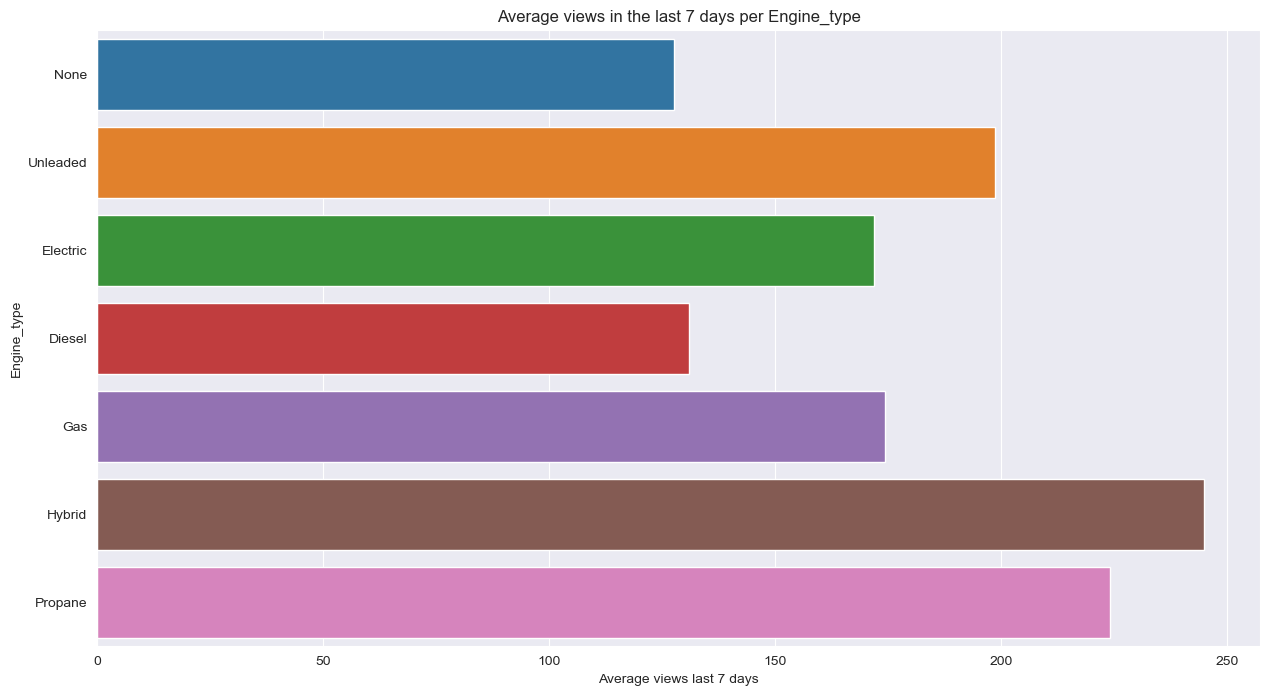

In [96]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',y='Engine_type', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None )
plt.title('Average views in the last 7 days per Engine_type')
plt.xlabel('Average views last 7 days')
plt.ylabel('Engine_type')

## The Insights"
The visualization shows that the Boat attracts the highest average views when the Engine type is hypbrid, followed by when the Engine type is Propane,Unleaded, Gas, Electric respectively.

In [97]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Engine_Types.png'))

### Number of views and Engine_condition(New/Used)

### Q3. How essential is the Engine_condition(New/Used) in attracting the views?

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\2971761360.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x='Engine_condition', y= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector

Text(0, 0.5, 'Average views last 7 days')

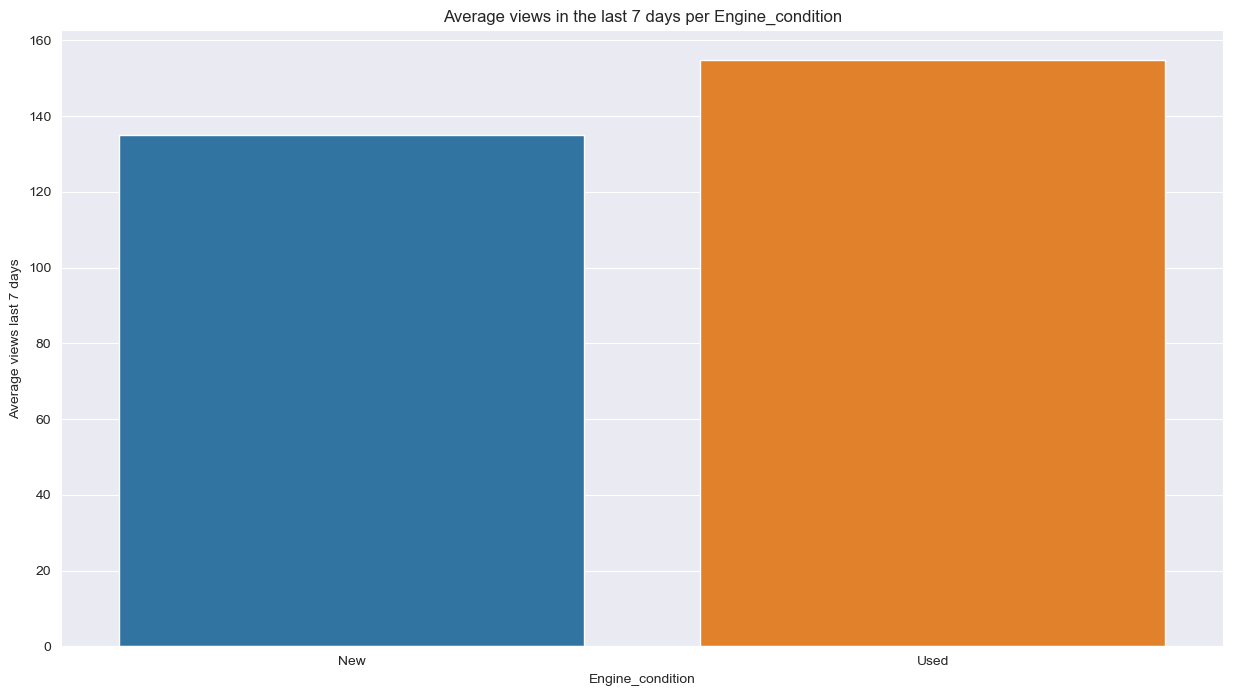

In [98]:
sns.set_style('darkgrid')
bar= sns.barplot(x='Engine_condition', y= 'Number of views last 7 days',
            data= df_cleaned,
            estimator= np.mean,
            ci= None )
plt.title('Average views in the last 7 days per Engine_condition')
plt.xlabel('Engine_condition')
plt.ylabel('Average views last 7 days')

## The Insights"
* The Barplots shows that people prefer Used Boats.

* Boats will get more views if its Engine is used before.

In [99]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Engine_Condition.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1930408648.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'Number of views last 7 days',y='Engine_type',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

Text(0, 0.5, 'Engine_type')

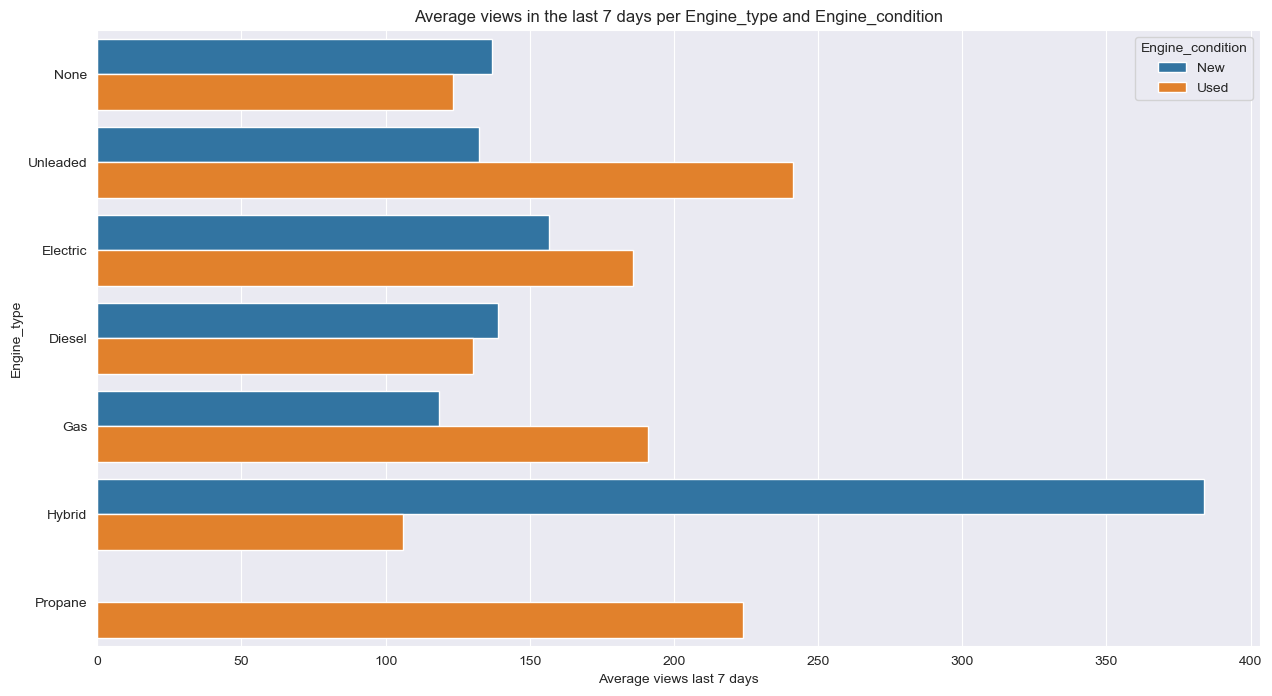

In [100]:
sns.set_style('darkgrid')
sns.barplot(x= 'Number of views last 7 days',y='Engine_type', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None,
            hue= 'Engine_condition')
plt.title('Average views in the last 7 days per Engine_type and Engine_condition')
plt.xlabel('Average views last 7 days')
plt.ylabel('Engine_type')

### Number of views last 7 days per Material

### How essential is the Materiall form which the Boat is mad of, in getting views?

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\2017010921.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Material')

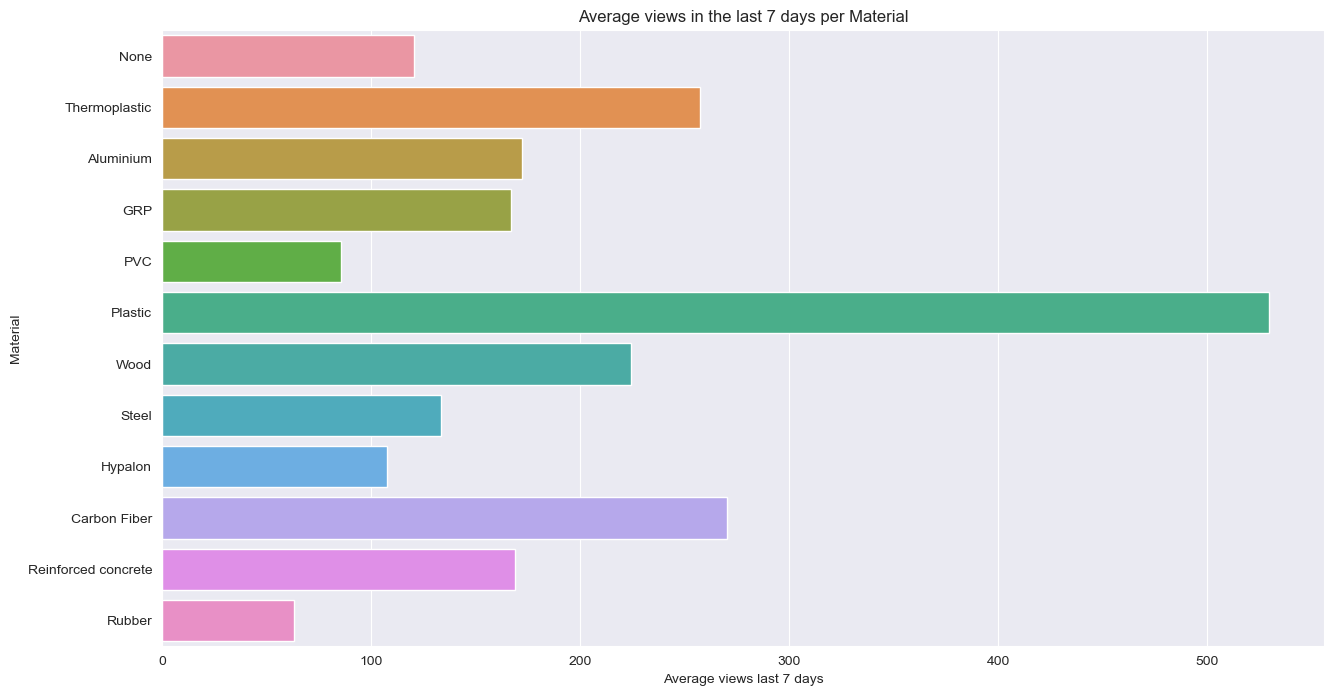

In [101]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Material', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None )
plt.title('Average views in the last 7 days per Material')
plt.xlabel('Average views last 7 days')
plt.ylabel('Material')

## The Insights:

*The barplot indicates that the Boat will get more average views if it is made of Plastic,
followed by Carbon Fiber and Thermopalstic respectively.

In [102]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Material.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1302838850.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Country')

C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


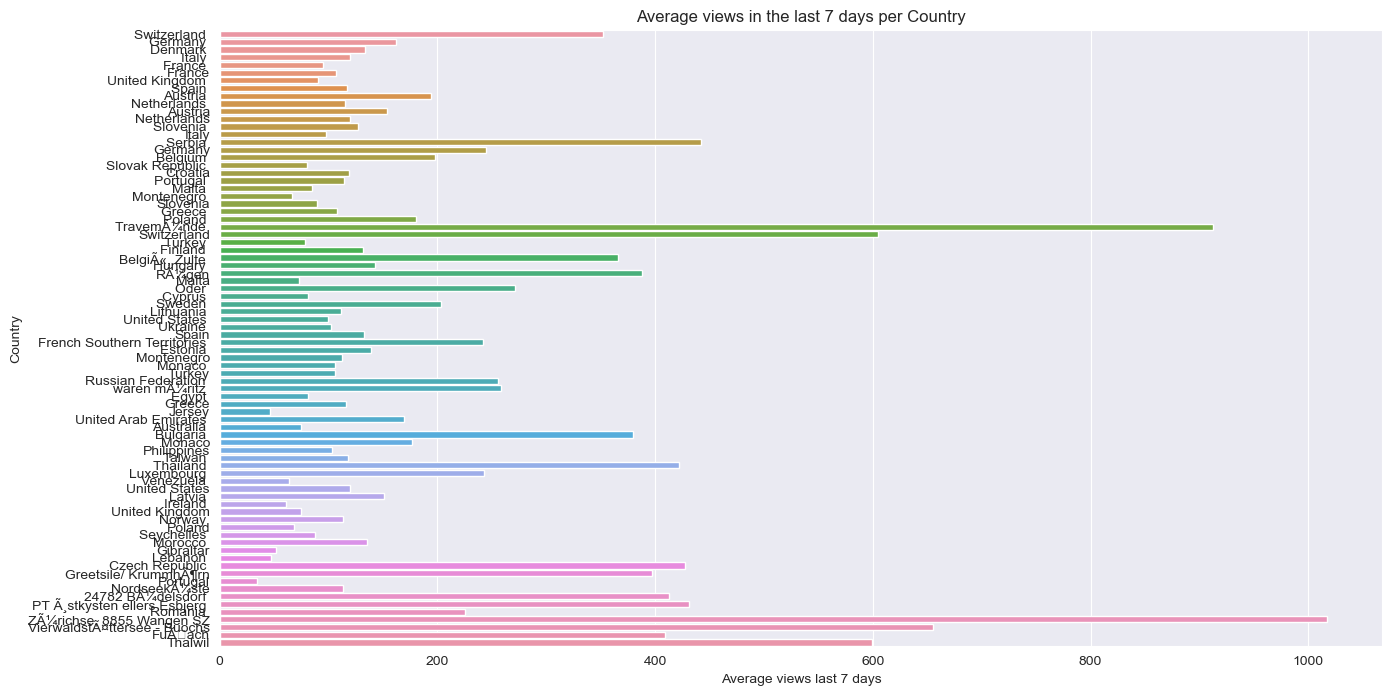

In [106]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Country', 
            data= df_cleaned,
            estimator= np.mean,
            ci=None )
plt.title('Average views in the last 7 days per Country')
plt.xlabel('Average views last 7 days')
plt.ylabel('Country')

In [107]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\4209420796.py:2: UserWarning: Glyph 159 (\x9f) missing from current font.
  bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country.png'))


## Average number of views in last 7 days per Country and Engine_condition

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1705230220.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anac

Text(0, 0.5, 'Country')

C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


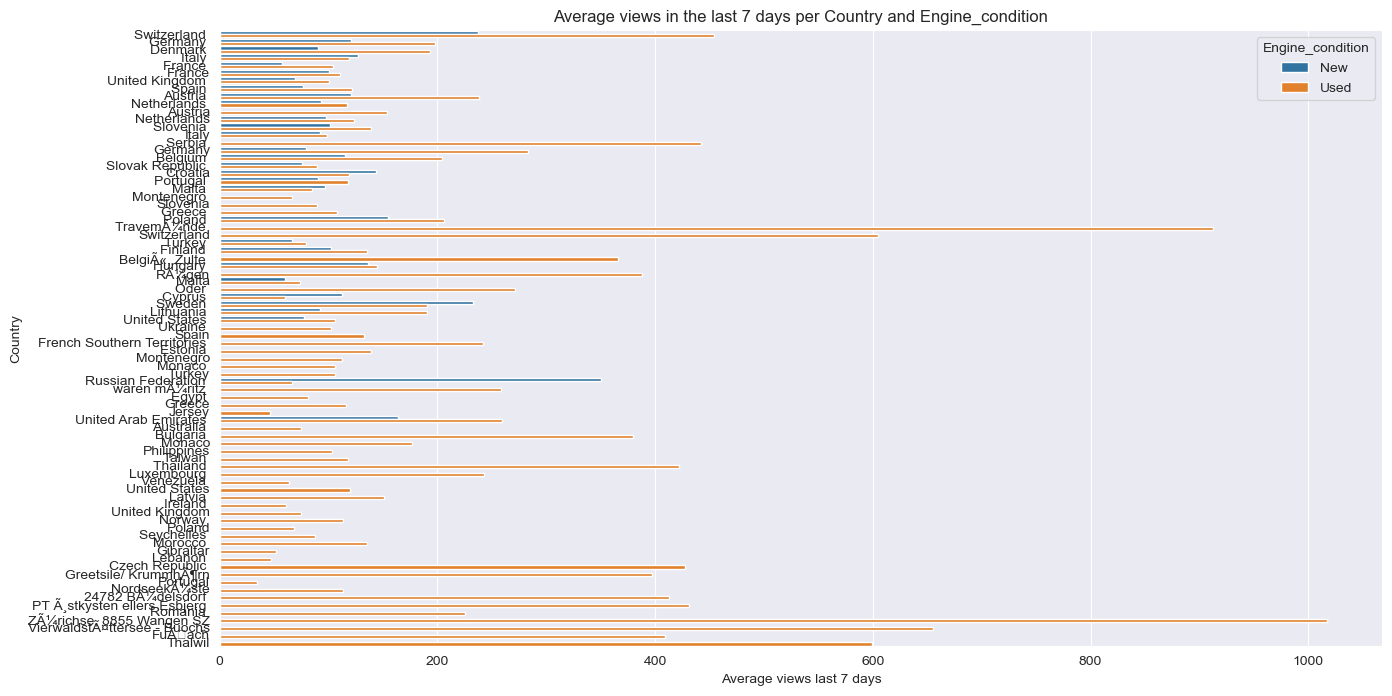

In [108]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Country', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None,
           hue= 'Engine_condition')
plt.title('Average views in the last 7 days per Country and Engine_condition')
plt.xlabel('Average views last 7 days')
plt.ylabel('Country')

In [109]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Engine_Condition.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\816562293.py:2: UserWarning: Glyph 159 (\x9f) missing from current font.
  bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Engine_Condition.png'))


## Average number of views in last 7 days per Country and Boat_Type

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\868024697.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaco

Text(0, 0.5, 'Country')

C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


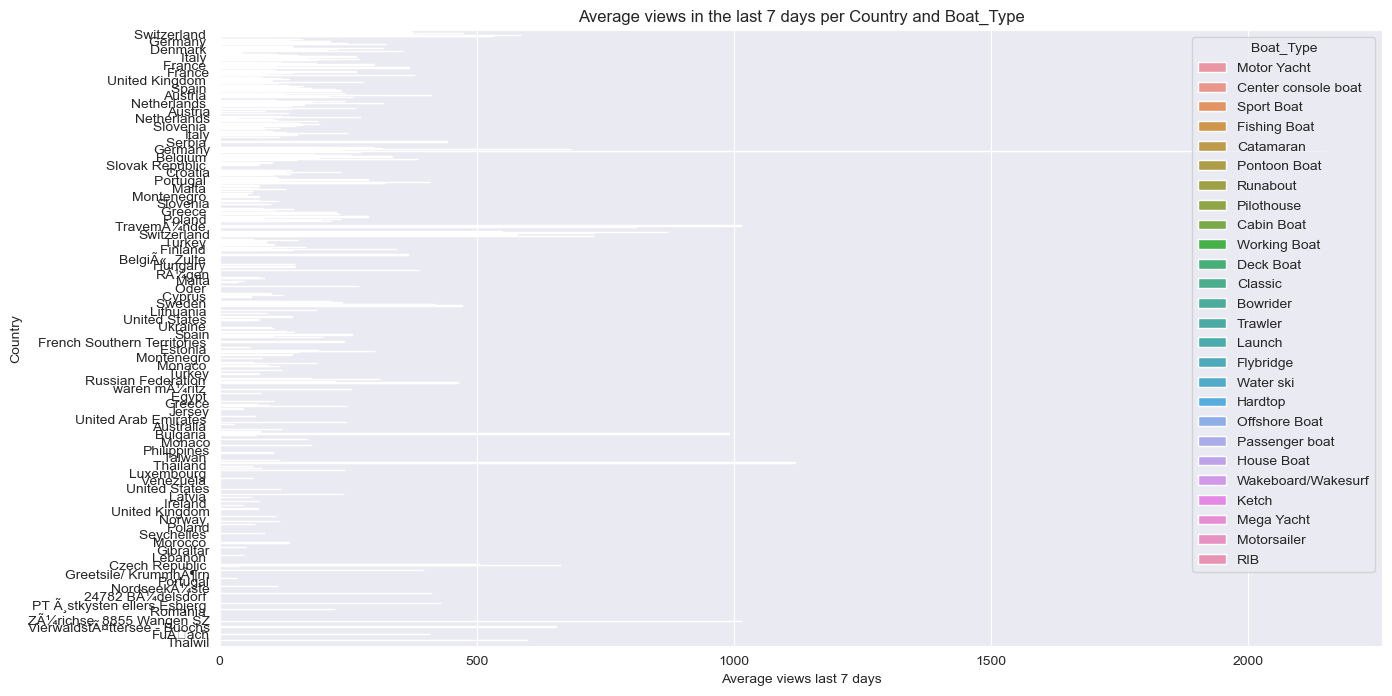

In [110]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Country', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None,
           hue= 'Boat_Type')
plt.title('Average views in the last 7 days per Country and Boat_Type')
plt.xlabel('Average views last 7 days')
plt.ylabel('Country')

In [111]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Boat_Type.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\3894927589.py:2: UserWarning: Glyph 159 (\x9f) missing from current font.
  bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Boat_Type.png'))


## Number of views last 7 days per Country and Engine_type

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1044079183.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anac

Text(0, 0.5, 'Country')

C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


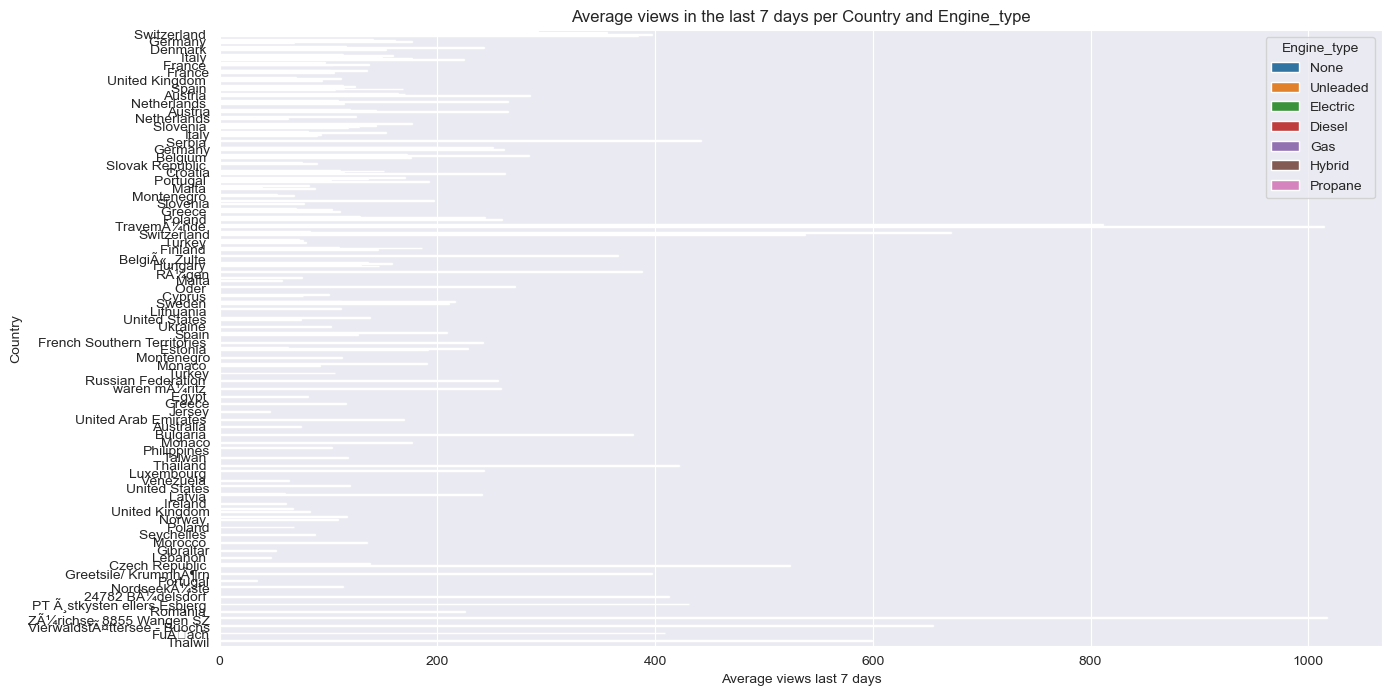

In [112]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Country', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None,
           hue= 'Engine_type')
plt.title('Average views in the last 7 days per Country and Engine_type')
plt.xlabel('Average views last 7 days')
plt.ylabel('Country')

In [113]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Engine_Type.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\2864840419.py:2: UserWarning: Glyph 159 (\x9f) missing from current font.
  bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Engine_Type.png'))


## Average Number of views last 7 days per Country and Material

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\3881624504.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anac

Text(0, 0.5, 'Country')

C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\karya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


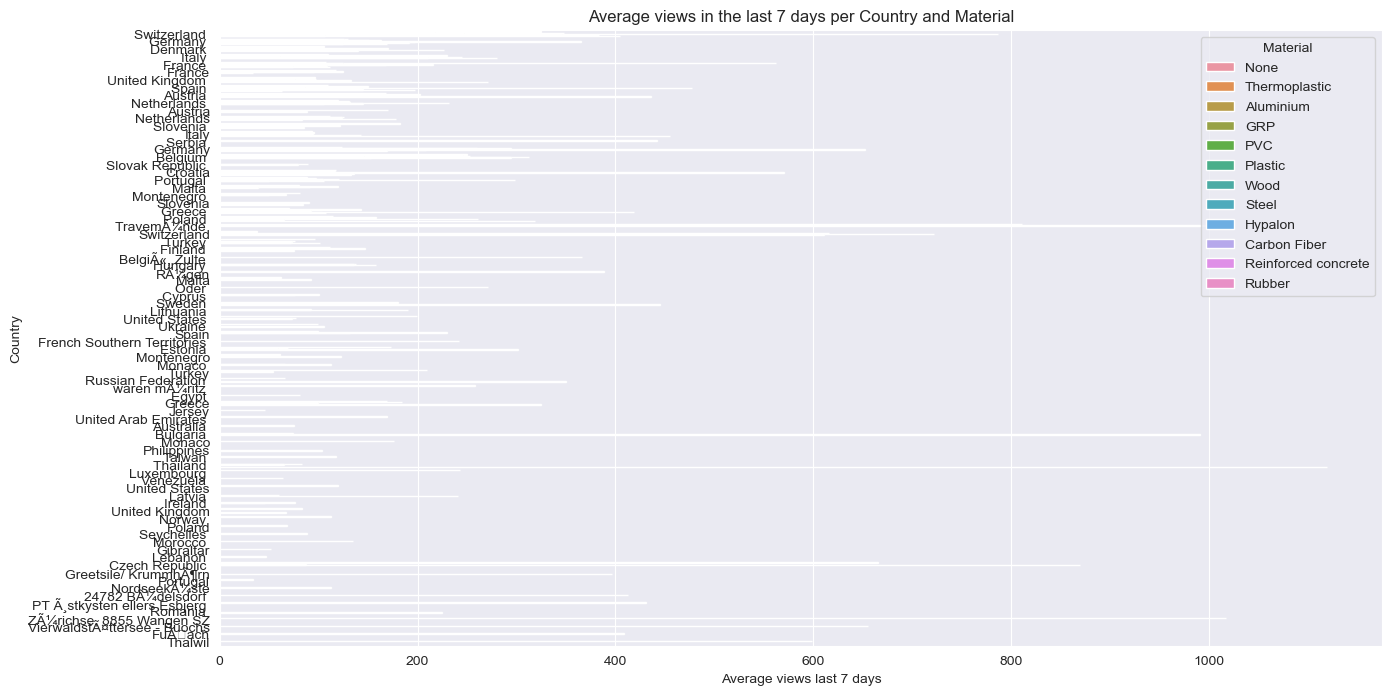

In [114]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Country', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None,
           hue= 'Material')
plt.title('Average views in the last 7 days per Country and Material')
plt.xlabel('Average views last 7 days')
plt.ylabel('Country')

In [115]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Material.png'))

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\1781987042.py:2: UserWarning: Glyph 159 (\x9f) missing from current font.
  bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Country_Material.png'))


### Average Number of views last 7 days per Boat_age

C:\Users\karya\AppData\Local\Temp\ipykernel_20536\3083668638.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar= sns.barplot(x= 'Number of views last 7 days',
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Boat_age')

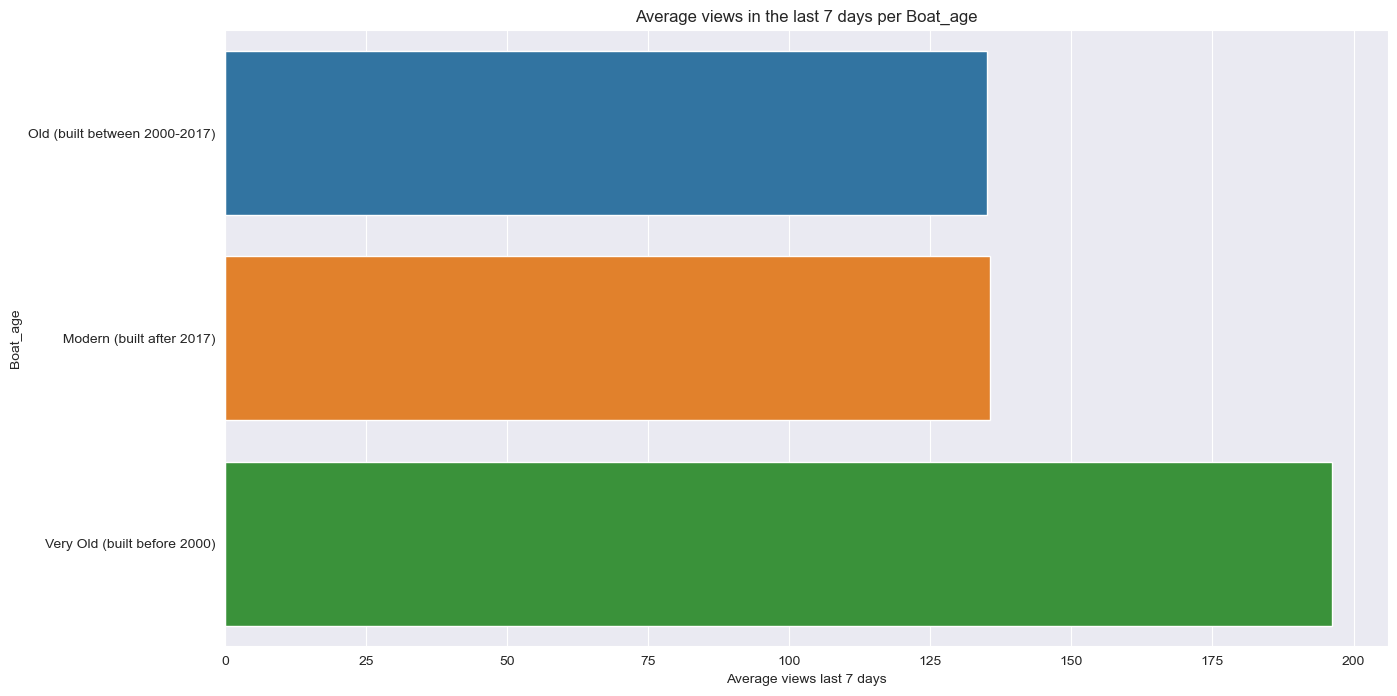

In [116]:
sns.set_style('darkgrid')
bar= sns.barplot(x= 'Number of views last 7 days',
            y='Boat_age', 
            data= df_cleaned,
            estimator= np.mean,
            ci= None)
plt.title('Average views in the last 7 days per Boat_age')
plt.xlabel('Average views last 7 days')
plt.ylabel('Boat_age')

In [117]:
# Exporting the Visualization
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'ave_No_of_Views_Boat_age.png'))

In [90]:
df_cleaned.to_csv(os.path.join(path, '02. Data','Prepared Data', 'Boat_Sales_clean_Dat.csv'))